# JupyterLab Installation by QZ

## Globle Configeration By root

### Change Node.js Version
```shell
nodejs -V
apt remove nodejs
curl -sL https://deb.nodesource.com/setup_12.x | sudo -E bash -
sudo apt-get install -y nodejs
```

### Install JupyterLab

```shell
pip3 install jupyterlab
pip3 install jupyterlab-latex
pip3 install ipympl

jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyterlab-drawio
jupyter labextension install @jupyterlab/latex
jupyter labextension install @krassowski/jupyterlab_go_to_definition
jupyter labextension install @jupyterlab/toc
```

### Fix Bug1: Chinese words being squares in matplotlib plot
Add fonts Microsoft YaHei

```shell
mkdir /usr/share/fonts/fonts_qz
sudo cp /data/qinz18/jupyter_test/msyh* /usr/share/fonts/fonts_qz
sudo fc-cache -fv

sudo vim /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc
```

```
// in matplotlibrc
font.family:  sans-serif
font.serif:      Microsoft YaHei,...
font.sans-serif: Microsoft YaHei,...
```

#### Matplotlib Example

Use `Shift+Enter` on the fellowing block to run this python code. 

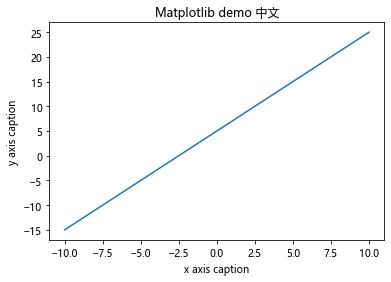

In [10]:
import numpy as np 
from matplotlib import pyplot as plt 
 
x = np.arange(-10,11) 
y =  2  * x +  5 
plt.title("Matplotlib demo 中文") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

### Fix Bug2: Chinese words will missing when convert .ipnb to pdf
```shell
vim /usr/local/lib/python3.6/dist-packages/nbconvert/templates/latex/article.tplx
```
```
//in article.tplx
((*- block docclass -*))
\documentclass[11pt]{article}
    \usepackage[UTF8,heading=true]{ctex}
((*- endblock docclass -*))
```

### Fix Bug3: Chinese words will desappear when use Latex-Preview
When we write .tex document, we can right-click to open a latex preview, but it can not show the Chinese words, though the Chinese words is correctly drawn on the pdf by Latex.

This bug seems difficult but not a big deal now, I will contact to deployer of jupyterlab-latex/rendermime-interface later.

<details><summary>Details</summary>
<pre>
I submit an issue on github
<a href="https://github.com/jupyterlab/jupyterlab/issues/8962" target="_blank">Can't see Chinese words in pdf viewer of JupyterLab #8962</a>
</pre>
<a href="https://sm.ms/image/fS8XjwiyYC29Aar" target="_blank"><img src="https://i.loli.net/2020/09/08/fS8XjwiyYC29Aar.png" ></a>
</details>




#### **[2020.09.11] It's Fixed now by QZ!**


It's about the module `pdf.js` and `@jupyterlab/latex`, jupyterlab use the `pdf.js` without the `cMapUrl`, so that pdfviewer of jupyterlab can't show many fonts.

we can change the file `jupyter/lab/staging/node_modules/@jupyterlab/latex/lib/pdf.js`:
```js
pdfjsLib
   .getDocument(this._objectUrl)
```
to
```js
pdfjsLib
   //.getDocument(this._objectUrl)
   .getDocument({url:this._objectUrl,cMapUrl:'https://unpkg.com/pdfjs-dist@2.0.943/cmaps/',cMapPacked:true})
```
Also can be viewed on github
<a href="https://github.com/jupyterlab/jupyterlab/issues/8962" target="_blank">Can't see Chinese words in pdf viewer of JupyterLab #8962</a>


### ReBuild ROOT to Enable PyROOT

```shell
-DPYTHON_EXECUTABLE:UNINITIALIZED=/usr/bin/python3.6 \
-DPYTHON_INCLUDE_DIR=/usr/include/python3.6 \
-DPYTHON_LIBRARY=/usr/lib/x86_64-linux-gnu/libpython3.6m.so.1.0
```

How to use ROOT on JupyterLab is showed on this test`/data/JupyROOT_test.ipynb`, to be completed.

Also, I will try labextension `@zaitsev136/jupyterlab-root-viewer` and `jupyterlab_rootjs`

**[2020.09.10]** **I fixed the jsroot bug now!(by QZ)**  See details in `/data/JupyROOT_test.ipynb`

### Add Spell Checker to JupyterLab[2020.09.19 QZ]

Find a nice extension [@ijmbarr/jupyterlab_spellchecker](https://github.com/ijmbarr/jupyterlab_spellchecker), to use the newest version of it, I rollback jupyterlab to `version@2.2.4`, so it can use the new future:`ignore` and `Suggestion`, like the gif in `detail`

<details><summary>Details</summary>
<pre>
Right-Click on the wrong spelling, you will see the `ignore` and `Suggestion`.
</pre>
<a href="https://github.com/ijmbarr/jupyterlab_spellchecker/pull/22" target="_blank"><img src="https://user-images.githubusercontent.com/5832902/88500326-41a19380-cfc0-11ea-9851-1c8edf7845f1.gif" ></a>
</details>

The original [@ijmbarr/jupyterlab_spellchecker](https://github.com/ijmbarr/jupyterlab_spellchecker) can't run on `.tex` file for latex, but I fixed it, can be seen in this issue [Spellcheck in TEX Documents?](https://github.com/ijmbarr/jupyterlab_spellchecker/issues/30).

In `/usr/local/share/jupyter/lab/staging/node_modules/@ijmbarr/jupyterlab_spellchecker/lib/index.js` or `~/.local/share/jupyter/lab/staging/node_modules/@ijmbarr/jupyterlab_spellchecker/lib/index.js`
```javascript
Use the following code:
 87         this.accepted_types = [
 88             'text/plain',
 89             'text/x-ipythongfm',
 90             'text/x-latex',
 91         ];

```

One more thing can with [@ijmbarr/jupyterlab_spellchecker](https://github.com/ijmbarr/jupyterlab_spellchecker) we can take some attention to follow is `Adding Additional Dictionaries` in [https://github.com/ijmbarr/jupyterlab_spellchecker/issues/29](https://github.com/ijmbarr/jupyterlab_spellchecker/issues/29).

### JupyterLab&Labextension Version [2020.09.19 QZ]
```shell
# jupyter labextension list
JupyterLab v2.2.4
Known labextensions:
   app dir: /usr/local/share/jupyter/lab
        @ijmbarr/jupyterlab_spellchecker v0.1.8  enabled  OK
        @jupyter-widgets/jupyterlab-manager v2.0.0  enabled  OK
        @jupyterlab/latex v2.0.1  enabled  OK
        @jupyterlab/toc v4.0.0  enabled  OK
        @krassowski/jupyterlab_go_to_definition v1.0.0  enabled  OK
        jupyter-matplotlib v0.7.3  enabled  OK
        jupyterlab-drawio v0.7.0  enabled  OK
```

## Build A Public JupyterLab(By root)

### Add User JupyterPublic
```shell
useradd -m -s /bin/bash -G ENPGmember JupyterPublic
```

### Build A Public JupyterLab
The prosejure is similar as section `Build Your Own JupyterLab (By user)`, we can login by URL:`http://166.111.26.233:10671` using a password.

When we use this Public JupyterLab, we are user JupyterPublic, we have the permission to Creat or Delete file/dir only created by JupyterPublic, and the File Browser will limited in dir:`/data`(treat it like `/`). You'd better create files/dirs in your own dir or dir:`/data/JupyterPublic`.

## Build Your Own JupyterLab (By user)
### Create Your JupyterLab Password and Config File

```shell
jupyter notebook password
```

It will also automaticly create a configure file `~/.jupyter/jupyter_notebook_config.json`, and fill your password(after hashed).

***You should make your password as strong as possible!***

### Configure

```shell
vim ~/.jupyter/jupyter_notebook_config.json
```

Follwing is the `jupyter_notebook_config.json` of JupyterPublic

```json
{
  "NotebookApp": {
    "password": "argon2:$argon2id$v=19$m=10240,t=10,p=8$wi8TYq9AOrtkJZXrIojqxQ$PwSMVdy4jlWNC34hUhVWhg",
    "allow_root": false,
    "ip": "0.0.0.0",
    "notebook_dir": "/data/qinz18",
    "open_browser": false,
    "port": 10671
  },
  "LatexConfig": {
    "run_times": 3
  }
}

```
Edit your `jupyter_notebook_config.json` same as JupyterPublic's, except the value of password, port, notebook_dir.

You must change the port to another number(in 10600-11000), then You'd better change notebook_dir to `/data/username`

### Build
**[2020.9.11]** This procedure not necessary now! jupyterlab app is now build on `/usr/local/share/jupyter/lab` by root.
```shell
jupyter lab build --app-dir=~/.local/share/jupyter/lab
```

### Run Your JupyterLab Background

**Two Way to Run Your JupyterLab Background**

`screen` or `nohup`

#### Using screen(Recommend)

- Using screen(Recommend):

```shell
screen -S myjupyter
# or make a log use this:
screen -L -Logfile screen_myjupyter.log -S myjupyter
# run jupyter lab:
jupyter lab
# then press Ctrl+A then D to exit(detach) screen
# you can use the following to get in when you want to check or shutdown your JupyterLab
screen -r myjupyter
# then you can just type exit to shutdown and kill this screen
```

#### Or using nohup
- Or using nohup:

```shell
nohup jupyter lab >nohub_myjupyter.log 2>$1 &
```

### Use the JyputerLab

Use your local browser to get URL:`http://166.111.26.233:[your_port]`, than login by your strong password just set.

### Remove JupyterLab for Yourself
If you want to remove JupyterLab(or reinstall it), you'd check this:
```shell
cp /home/qinz18/removejupyterlab.sh ~
. ~/removejupyterlab.sh
```